# Web Scraping Lab

You will find in this notebook some scrapy exercises to practise your scraping skills.

**Tips:**

- Check the response status code for each request to ensure you have obtained the intended contennt.
- Print the response text in each request to understand the kind of info you are getting and its format.
- Check for patterns in the response text to extract the data/info requested in each question.
- Visit each url and take a look at its source through Chrome DevTools. You'll need to identify the html tags, special class names etc. used for the html content you are expected to extract.

- [Requests library](http://docs.python-requests.org/en/master/#the-user-guide) documentation 
- [Beautiful Soup Doc](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
- [Urllib](https://docs.python.org/3/library/urllib.html#module-urllib)
- [re lib](https://docs.python.org/3/library/re.html)
- [lxml lib](https://lxml.de/)
- [Scrapy](https://scrapy.org/)
- [List of HTTP status codes](https://en.wikipedia.org/wiki/List_of_HTTP_status_codes)
- [HTML basics](http://www.simplehtmlguide.com/cheatsheet.php)
- [CSS basics](https://www.cssbasics.com/#page_start)

#### Below are the libraries and modules you may need. `requests`,  `BeautifulSoup` and `pandas` are imported for you. If you prefer to use additional libraries feel free to uncomment them.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from pprint import pprint
from lxml import html
from lxml.html import fromstring
import urllib.request
from urllib.request import urlopen
import random
import re
# import scrapy # No he podido instalarla. Luego lo miro en casa.

#### Download, parse (using BeautifulSoup), and print the content from the Trending Developers page from GitHub:

In [134]:
# This is the url you will scrape in this exercise
url = 'https://github.com/trending/developers'

In [135]:
#your code
res = requests.get(url)
html = res.text

In [136]:
soup = BeautifulSoup(html, 'html.parser')

#### Display the names of the trending developers retrieved in the previous step.

Your output should be a Python list of developer names. Each name should not contain any html tag.

**Instructions:**

1. Find out the html tag and class names used for the developer names. You can achieve this using Chrome DevTools.

1. Use BeautifulSoup to extract all the html elements that contain the developer names.

1. Use string manipulation techniques to replace whitespaces and linebreaks (i.e. `\n`) in the *text* of each html element. Use a list to store the clean names.

1. Print the list of names.

Your output should look like below:

```
['trimstray (@trimstray)',
 'joewalnes (JoeWalnes)',
 'charlax (Charles-AxelDein)',
 'ForrestKnight (ForrestKnight)',
 'revery-ui (revery-ui)',
 'alibaba (Alibaba)',
 'Microsoft (Microsoft)',
 'github (GitHub)',
 'facebook (Facebook)',
 'boazsegev (Bo)',
 'google (Google)',
 'cloudfetch',
 'sindresorhus (SindreSorhus)',
 'tensorflow',
 'apache (TheApacheSoftwareFoundation)',
 'DevonCrawford (DevonCrawford)',
 'ARMmbed (ArmMbed)',
 'vuejs (vuejs)',
 'fastai (fast.ai)',
 'QiShaoXuan (Qi)',
 'joelparkerhenderson (JoelParkerHenderson)',
 'torvalds (LinusTorvalds)',
 'CyC2018',
 'komeiji-satori (神楽坂覚々)',
 'script-8']
 ```

In [162]:
developers_list = []
i = 1
for e in range(25):
    developer = soup.find_all('h1')[i]
    developer_name = developer.find("a").text
    developer_nick = developer.find("a").get('href')
    developers_list.append(developer_name)
    developers_list.append(developer_nick)
    i += 2

developers = ''.join(developers_list)
developers = re.sub('\\n','',developers)
developers = re.sub('/',' (',developers)
developers = developers.split('            ')[1:]
developers = [e+')' for e in developers]
print(developers)

['Emmanuel Garcia (blasten)', 'Hugo van Kemenade (hugovk)', 'Darío Kondratiuk (kblok)', 'Megan Marsh (SwampDragons)', 'Minko Gechev (mgechev)', 'William Falcon (williamFalcon)', 'Yoshifumi Kawai (neuecc)', 'Mateusz Burzyński (Andarist)', 'Sam Verschueren (SamVerschueren)', 'Whyrusleeping (whyrusleeping)', 'Holger Rapp (SirVer)', 'Francois Zaninotto (fzaninotto)', 'Dylan Vann (DylanVann)', 'Miek Gieben (miekg)', 'Richard Schneeman (schneems)', 'Alec Thomas (alecthomas)', '陈帅 (chenshuai2144)', 'François Beaufort (beaufortfrancois)', 'Tanner Linsley (tannerlinsley)', 'Erik Wijmans (erikwijmans)', 'Joshua Blum (joshblum)', 'Gabriel Aszalos (gbbr)', 'Rico Sta. Cruz (rstacruz)', 'Solly Ross (DirectXMan12)', 'Vinayak Mehta (vinayak-mehta)']


#### Display the trending Python repositories in GitHub

The steps to solve this problem is similar to the previous one except that you need to find out the repository names instead of developer names.

In [163]:
# This is the url you will scrape in this exercise
url = 'https://github.com/trending/python?since=daily'

In [164]:
#your code
res = requests.get(url)
html = res.text
soup = BeautifulSoup(html, 'html.parser')

In [165]:
repo_list = []
for i in range(1,26):
    repo = soup.find_all('h1')[i]
    repo2 = repo.find("a").text
    repo_list.append(repo2)
repos = ''.join(repo_list)
repos = re.sub('\\n','',repos)
repos = repos.split('        ')[1:]

repos_new = []
for e in repos:
    aux = re.sub('     ','',e)
    aux = re.sub(' ','',e)
    repos_new.append(aux)
print(repos_new)

['deezer/spleeter', 'openai/gpt-2', 'PaddlePaddle/models', '0voice/interview_internal_reference', 'kubernetes-client/python', 'svjan5/GNNs-for-NLP', 'Linzaer/Ultra-Light-Fast-Generic-Face-Detector-1MB', 'huggingface/transformers', 'MalongTech/research-charnet', 'thorn-oss/perception', 'eastlakeside/interpy-zh', 'Azure/azure-cli', 'encode/django-rest-framework', 'wangzheng0822/algo', 'marshmallow-code/marshmallow', 'tensorflow/models', 'momika233/ClamAV_0Day_exploit', 'zihangdai/xlnet', 'sinovation/ZEN', 'shenweichen/DeepCTR', 'google-research/bert', 'geekcomputers/Python', 'facebookresearch/hydra', 'encode/httpx', 'charlesq34/pointnet2']


#### Display all the image links from Walt Disney wikipedia page

In [2]:
# This is the url you will scrape in this exercise
url = 'https://en.wikipedia.org/wiki/Walt_Disney'

In [3]:
#your code
res = requests.get(url)
html = res.text
soup = BeautifulSoup(html, 'html.parser')

In [10]:
links_list = []
images = soup.find_all("img")
for e in images:
    links_list.append(e.get('src'))
print(links_list)

['//upload.wikimedia.org/wikipedia/en/thumb/e/e7/Cscr-featured.svg/20px-Cscr-featured.svg.png', '//upload.wikimedia.org/wikipedia/en/thumb/1/1b/Semi-protection-shackle.svg/20px-Semi-protection-shackle.svg.png', '//upload.wikimedia.org/wikipedia/commons/thumb/d/df/Walt_Disney_1946.JPG/220px-Walt_Disney_1946.JPG', '//upload.wikimedia.org/wikipedia/commons/thumb/8/87/Walt_Disney_1942_signature.svg/150px-Walt_Disney_1942_signature.svg.png', '//upload.wikimedia.org/wikipedia/commons/thumb/c/c4/Walt_Disney_envelope_ca._1921.jpg/220px-Walt_Disney_envelope_ca._1921.jpg', '//upload.wikimedia.org/wikipedia/commons/thumb/4/4d/Newman_Laugh-O-Gram_%281921%29.webm/220px-seek%3D2-Newman_Laugh-O-Gram_%281921%29.webm.jpg', '//upload.wikimedia.org/wikipedia/commons/thumb/0/0d/Trolley_Troubles_poster.jpg/170px-Trolley_Troubles_poster.jpg', '//upload.wikimedia.org/wikipedia/commons/thumb/7/71/Walt_Disney_and_his_cartoon_creation_%22Mickey_Mouse%22_-_National_Board_of_Review_Magazine.jpg/170px-Walt_Disney_

In [12]:
from IPython.display import Image
from IPython.core.display import HTML
for e in links_list[2:5]: # imprimo sólo algunas por no abusar... :P
    display(Image(url=e))

#### Retrieve an arbitary Wikipedia page of "Python" and create a list of links on that page

In [87]:
# This is the url you will scrape in this exercise
url ='https://en.wikipedia.org/wiki/Python' 

In [88]:
#your code
res = requests.get(url)
html = res.text
soup = BeautifulSoup(html, 'html.parser')

In [89]:
links_list = []
links = soup.find_all('a')
for e in links:
    links_list.append(e.get('href'))
links_list = links_list[1:]
# print(links_list)

print('Links http:')
links_http = []
for e in links_list:
    if e[:4] == 'http':
        links_http.append(e)
print(links_http)

print('\nLinks wikipedia:')
links_wikipedia = []
for e in links_list:
    if e[0] == '/':
        links_wikipedia.append(e)
print(links_wikipedia)

Links http:
['https://en.wiktionary.org/wiki/Python', 'https://en.wiktionary.org/wiki/python', 'https://en.wikipedia.org/w/index.php?title=Special:WhatLinksHere/Python&namespace=0', 'https://en.wikipedia.org/w/index.php?title=Python&oldid=924004650', 'https://donate.wikimedia.org/wiki/Special:FundraiserRedirector?utm_source=donate&utm_medium=sidebar&utm_campaign=C13_en.wikipedia.org&uselang=en', 'https://www.wikidata.org/wiki/Special:EntityPage/Q747452', 'https://commons.wikimedia.org/wiki/Category:Python', 'https://af.wikipedia.org/wiki/Python', 'https://als.wikipedia.org/wiki/Python', 'https://az.wikipedia.org/wiki/Python', 'https://bn.wikipedia.org/wiki/%E0%A6%AA%E0%A6%BE%E0%A6%87%E0%A6%A5%E0%A6%A8_(%E0%A6%A6%E0%A7%8D%E0%A6%AC%E0%A7%8D%E0%A6%AF%E0%A6%B0%E0%A7%8D%E0%A6%A5%E0%A6%A4%E0%A6%BE_%E0%A6%A8%E0%A6%BF%E0%A6%B0%E0%A6%B8%E0%A6%A8)', 'https://be.wikipedia.org/wiki/Python', 'https://bg.wikipedia.org/wiki/%D0%9F%D0%B8%D1%82%D0%BE%D0%BD_(%D0%BF%D0%BE%D1%8F%D1%81%D0%BD%D0%B5%D0%BD%D0

#### Number of Titles that have changed in the United States Code since its last release point 

In [90]:
# This is the url you will scrape in this exercise
url = 'http://uscode.house.gov/download/download.shtml'

In [91]:
#your code
res = requests.get(url)
html = res.text
soup = BeautifulSoup(html, 'html.parser')

In [92]:
# Titles in bold have been changed since the last release point.

titles_changed = soup.select('.usctitlechanged')
# print(titles_changed)

print(len(titles_changed),'titles have been changed since the last release point.') # 2

print('\nTitles:')
titles_changed_list = []
for e in titles_changed:
    title = e.text
    title = re.sub('\\n','',title)
    title = re.sub('          ','',title)
    title = re.sub('        ','',title)
    title = re.sub(' ٭','',title)
    titles_changed_list.append(title)
print(titles_changed_list)

2 titles have been changed since the last release point.

Titles:
['Title 6 - Domestic Security', 'Title 31 - Money and Finance']


#### A Python list with the top ten FBI's Most Wanted names 

In [97]:
# This is the url you will scrape in this exercise
url = 'https://www.fbi.gov/wanted/topten'

In [98]:
#your code
res = requests.get(url)
html = res.text
soup = BeautifulSoup(html, 'html.parser')

In [106]:
names_FBI_list = []
names_FBI = soup.find_all('h3')
for e in names_FBI:
    name = e.text
    name = re.sub('\n','',name)
    name = name.title()
    names_FBI_list.append(name)
print(names_FBI_list)


['Jason Derek Brown', 'Alexis Flores', 'Eugene Palmer', 'Santiago Villalba Mederos', 'Rafael Caro-Quintero', 'Robert William Fisher', 'Bhadreshkumar Chetanbhai Patel', 'Arnoldo Jimenez', 'Alejandro Rosales Castillo', 'Yaser Abdel Said']


####  20 latest earthquakes info (date, time, latitude, longitude and region name) by the EMSC as a pandas dataframe

In [2]:
# This is the url you will scrape in this exercise
url = 'https://www.emsc-csem.org/Earthquake/'

In [3]:
#your code
res = requests.get(url)
html = res.text
soup = BeautifulSoup(html, 'html.parser')

In [41]:
table = soup.find_all('tr')
len(table) # 67

# Date and time:
date_time = soup.find_all('b')
date_time_list = [e.text for e in date_time]
date_time_list = [re.sub('earthquake','',e) for e in date_time_list]
date_time_list = date_time_list[:20] # 20 latest earthquakes

date_time_list_new = []
for e in date_time_list:
    date_time_list_new.append(e.split('\xa0\xa0\xa0'))

date = [e[0] for e in date_time_list_new]
time = [e[1] for e in date_time_list_new]

print(date)
print('\n',time)

['2019-11-07', '2019-11-07', '2019-11-07', '2019-11-07', '2019-11-07', '2019-11-07', '2019-11-07', '2019-11-07', '2019-11-07', '2019-11-07', '2019-11-07', '2019-11-07', '2019-11-07', '2019-11-07', '2019-11-07', '2019-11-07', '2019-11-07', '2019-11-07', '2019-11-07', '2019-11-07']

 ['17:52:17.6', '17:47:53.2', '17:35:21.7', '17:18:00.0', '16:50:25.0', '16:24:29.1', '15:40:53.7', '15:40:09.0', '15:14:49.0', '15:08:11.6', '15:01:10.8', '14:54:15.5', '14:52:50.5', '14:37:54.3', '14:36:33.3', '14:33:33.7', '14:33:33.0', '14:21:48.6', '13:34:38.1', '13:30:57.8']


In [69]:
# Latitude & Longitude:
lat_long = soup.select('.tabev1')
lat_long_list = [re.sub('td class="tabev1">','',e.text) for e in lat_long]
lat_long_list_2 = [re.sub('\xa0','',e) for e in lat_long_list]
lat_long_list_2
lat_list = lat_long_list_2[::2]
long_list = lat_long_list_2[1::2]
lat_list = lat_list[:20]
long_list = long_list[:20]
print(lat_list)
print('\n',long_list)

['34.27', '41.77', '41.78', '12.41', '31.78', '39.14', '43.93', '31.37', '21.65', '42.72', '42.73', '34.27', '34.27', '19.12', '27.15', '34.28', '19.80', '3.98', '59.02', '34.27']

 ['119.29', '13.61', '13.61', '77.18', '71.30', '20.61', '11.59', '68.55', '68.63', '13.23', '13.25', '119.29', '119.29', '67.24', '55.04', '119.29', '69.83', '104.01', '152.18', '119.30']


In [56]:
# Region name
region = soup.select('.tb_region')
region_list = [re.sub('\\xa0','',e.text).title() for e in region]
region_list = region_list[:20]
print(region_list)

['Santa Barbara Channel, Calif.', 'Southern Italy', 'Southern Italy', 'Near Coast Of Central Peru', 'Coquimbo, Chile', 'Greece', 'Central Italy', 'San Juan, Argentina', 'Antofagasta, Chile', 'Central Italy', 'Central Italy', 'Santa Barbara Channel, Calif.', 'Santa Barbara Channel, Calif.', 'Puerto Rico Region', 'Southern Iran', 'Greater Los Angeles Area, Calif.', 'Dominican Republic Region', 'Central East Pacific Rise', 'Southern Alaska', 'Santa Barbara Channel, Calif.']


In [70]:
# Empty dataframe:
df = pd.DataFrame({'date':[0]*20,'time':[0]*20,'latitude':[0]*20,'longitude':[0]*20,'region':[0]*20})
# display(df)

In [71]:
df['date'] = date
df['time'] = time
df['region'] = region_list
df['latitude'] = lat_list
df['longitude'] = long_list

In [72]:
display(df)

,date,time,latitude,longitude,region
0,2019-11-07,17:52:17.6,34.27,119.29,"Santa Barbara Channel, Calif."
1,2019-11-07,17:47:53.2,41.77,13.61,Southern Italy
2,2019-11-07,17:35:21.7,41.78,13.61,Southern Italy
3,2019-11-07,17:18:00.0,12.41,77.18,Near Coast Of Central Peru
4,2019-11-07,16:50:25.0,31.78,71.30,"Coquimbo, Chile"
5,2019-11-07,16:24:29.1,39.14,20.61,Greece
6,2019-11-07,15:40:53.7,43.93,11.59,Central Italy
7,2019-11-07,15:40:09.0,31.37,68.55,"San Juan, Argentina"
8,2019-11-07,15:14:49.0,21.65,68.63,"Antofagasta, Chile"
9,2019-11-07,15:08:11.6,42.72,13.23,Central Italy


#### Display the date, days, title, city, country of next 25 hackathon events as a Pandas dataframe table

In [2]:
# This is the url you will scrape in this exercise
url ='https://hackevents.co/hackathons'

In [3]:
#your code
res = requests.get(url)
html = res.text
soup = BeautifulSoup(html, 'html.parser')

# Sólo aparece un evento y no podemos acceder a sus datos.

#### Count number of tweets by a given Twitter account.

You will need to include a ***try/except block*** for account names not found. 
<br>***Hint:*** the program should count the number of tweets for any provided account

In [30]:
# This is the url you will scrape in this exercise 
# You will need to add the account credentials to this url

# try: # 'Correct account name!'
# except: # "Account name not found"
# No me funciona el try/except... No consigo que lance la excepción.

account_name = 'abuelo19801'
url = 'https://twitter.com/{}'.format(account_name)
res = requests.get(url)
html = res.text
soup = BeautifulSoup(html, 'html.parser')

In [46]:
tweets = soup.select('.ProfileNav-value')[0].text
tweets = re.sub('\n','',tweets)
tweets = re.sub('            ','',tweets)
print('The account {} has {} tweets.'.format(account_name,tweets))

The account abuelo19801 has 2.594 tweets.


#### Number of followers of a given twitter account

You will need to include a ***try/except block*** in case account/s name not found. 
<br>***Hint:*** the program should count the followers for any provided account

In [41]:
# This is the url you will scrape in this exercise 
# You will need to add the account credentials to this url

# Try/Except!!

account_name = 'abuelo19801'
url = 'https://twitter.com/{}'.format(account_name)
res = requests.get(url)
html = res.text
soup = BeautifulSoup(html, 'html.parser')

In [45]:
#your code
followers = soup.select('.ProfileNav-value')[2].text
print('The account {} has {} followers.'.format(account_name,followers))

The account abuelo19801 has 196 followers.


#### List all language names and number of related articles in the order they appear in wikipedia.org

In [74]:
# This is the url you will scrape in this exercise
url = 'https://www.wikipedia.org/'

In [75]:
#your code
res = requests.get(url)
html = res.text
soup = BeautifulSoup(html, 'html.parser')

In [76]:
language = soup.select('strong')[1:11]
language = [e.text for e in language]
print(language)

# (language[2].encode())
# .decode('utf-8')

# No consigo codificarlo bien...

['English', 'EspaÃ±ol', 'æ\x97¥æ\x9c¬èª\x9e', 'Deutsch', 'Ð\xa0Ñ\x83Ñ\x81Ñ\x81ÐºÐ¸Ð¹', 'FranÃ§ais', 'Italiano', 'ä¸\xadæ\x96\x87', 'PortuguÃªs', 'Polski']


In [94]:
articles = soup.select('bdi')[0:10]
articles = [str(e) for e in articles]
articles = [re.sub('<bdi dir="ltr">','',e) for e in articles]
articles = [re.sub('\+</bdi>','',e) for e in articles] 
articles = [re.sub('\xa0','',e) for e in articles]
articles = [int(e) for e in articles]
print(articles)

[5964000, 1554000, 1175000, 2361000, 1576000, 2152000, 1562000, 1080000, 1014000, 1367000]


#### A list with the different kind of datasets available in data.gov.uk 

In [95]:
# This is the url you will scrape in this exercise
url = 'https://data.gov.uk/'

In [96]:
#your code
res = requests.get(url)
html = res.text
soup = BeautifulSoup(html, 'html.parser')

In [99]:
datasets = soup.find_all('h2')
datasets_list = [e.text for e in datasets]
print(datasets_list)

['Business and economy', 'Crime and justice', 'Defence', 'Education', 'Environment', 'Government', 'Government spending', 'Health', 'Mapping', 'Society', 'Towns and cities', 'Transport']


#### Top 10 languages by number of native speakers stored in a Pandas Dataframe

In [100]:
# This is the url you will scrape in this exercise
url = 'https://en.wikipedia.org/wiki/List_of_languages_by_number_of_native_speakers'

In [101]:
#your code
res = requests.get(url)
html = res.text
soup = BeautifulSoup(html, 'html.parser')

In [116]:
table = soup.find_all('tbody')[0]
filas = table.find_all('tr')[1:]

lista = []
for fila in filas:
    celdas = fila.find_all('td')
    diccionario = {
        "languages": celdas[1].find('a').text,
        "native_speakers": re.sub('\n','',celdas[4].text),
    }
    lista.append(diccionario)

top10 = lista[0:10]
print(top10)

[{'languages': 'Mandarin', 'native_speakers': '918'}, {'languages': 'Spanish', 'native_speakers': '480'}, {'languages': 'English', 'native_speakers': '379'}, {'languages': 'Hindi', 'native_speakers': '341'}, {'languages': 'Bengali', 'native_speakers': '228'}, {'languages': 'Portuguese', 'native_speakers': '221'}, {'languages': 'Russian', 'native_speakers': '154'}, {'languages': 'Japanese', 'native_speakers': '128'}, {'languages': 'Western Punjabi', 'native_speakers': '92.7'}, {'languages': 'Marathi', 'native_speakers': '83.1'}]


In [125]:
df = pd.DataFrame(top10)
display(df)

,languages,native_speakers
0,Mandarin,918
1,Spanish,480
2,English,379
3,Hindi,341
4,Bengali,228
5,Portuguese,221
6,Russian,154
7,Japanese,128
8,Western Punjabi,92.7
9,Marathi,83.1


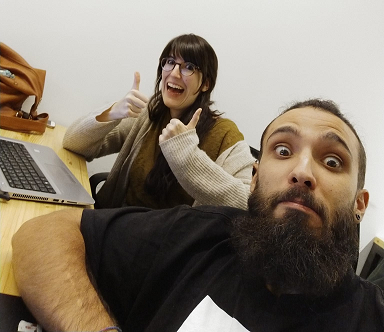

In [4]:
# from IPython.display import Image
# from IPython.core.display import HTML
display(Image('https://i.ibb.co/HYnwF9S/Sin-t-tulo.png'))

### BONUS QUESTIONS

#### Scrape a certain number of tweets of a given Twitter account.

In [ ]:
# This is the url you will scrape in this exercise 
# You will need to add the account credentials to this url
url = 'https://twitter.com/'

In [ ]:
# your code

#### IMDB's Top 250 data (movie name, Initial release, director name and stars) as a pandas dataframe

In [ ]:
# This is the url you will scrape in this exercise 
url = 'https://www.imdb.com/chart/top'

In [ ]:
# your code

#### Movie name, year and a brief summary of the top 10 random movies (IMDB) as a pandas dataframe.

In [ ]:
#This is the url you will scrape in this exercise
url = 'http://www.imdb.com/chart/top'

In [ ]:
#your code

#### Find the live weather report (temperature, wind speed, description and weather) of a given city.

In [ ]:
#https://openweathermap.org/current
city = city=input('Enter the city:')
url = 'http://api.openweathermap.org/data/2.5/weather?'+'q='+city+'&APPID=b35975e18dc93725acb092f7272cc6b8&units=metric'

In [ ]:
# your code

#### Book name,price and stock availability as a pandas dataframe.

In [ ]:
# This is the url you will scrape in this exercise. 
# It is a fictional bookstore created to be scraped. 
url = 'http://books.toscrape.com/'

In [ ]:
#your code